In [1]:
#read data


import pandas as pd

import numpy as np
import os

import matplotlib.pyplot as plt
data=pd.read_csv(r'C:\Users\hp\Documents\05_M02_DC_train.csv')
faults_df= pd.read_csv(r"C:\Users\hp\Downloads\05_M02_train_fault_data.csv")

#  Before failure degredation analysis:

In [223]:
features=['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK']

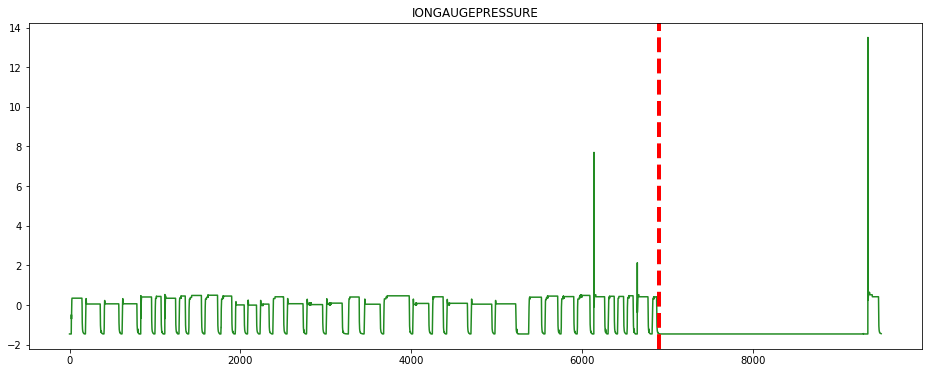

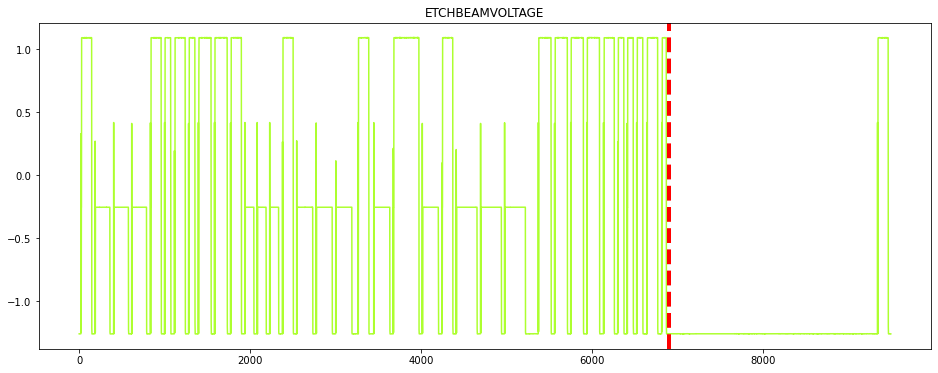

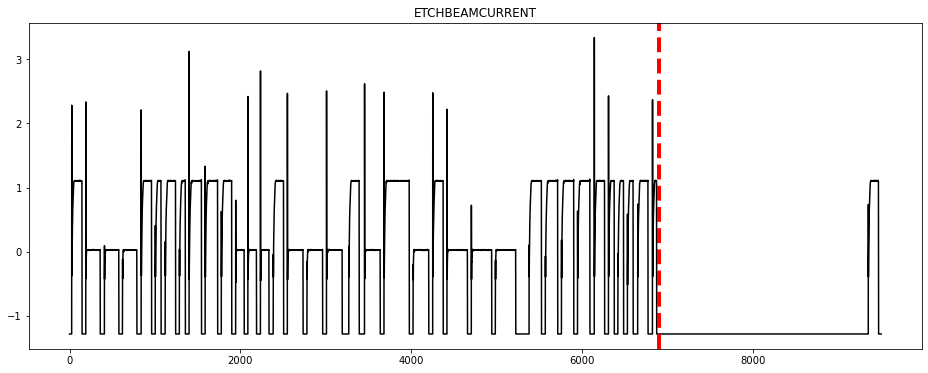

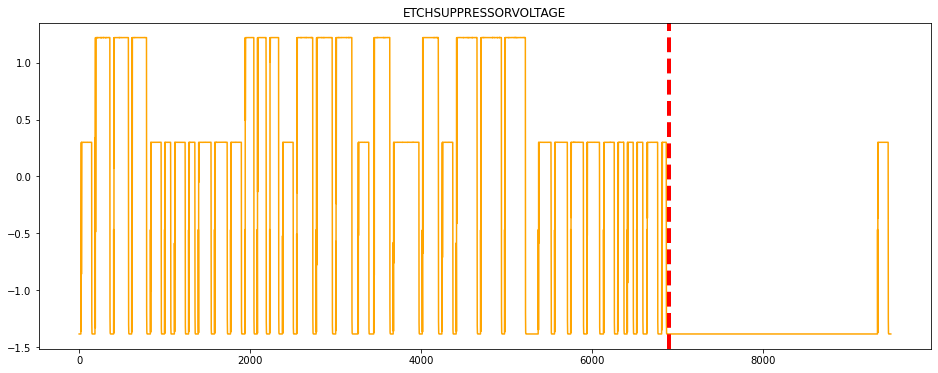

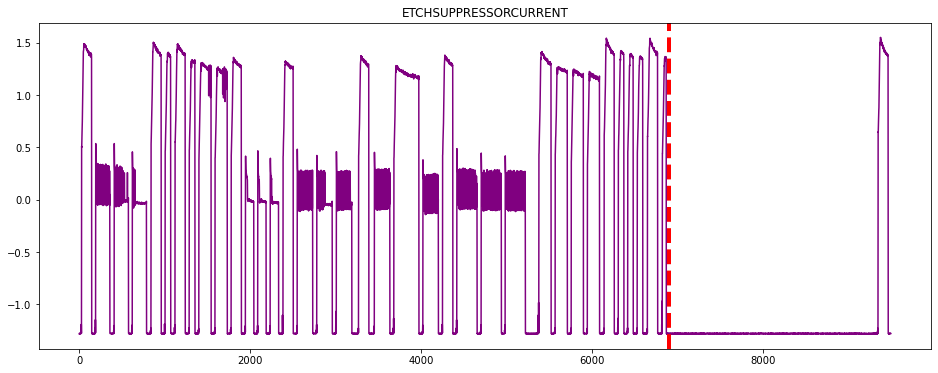

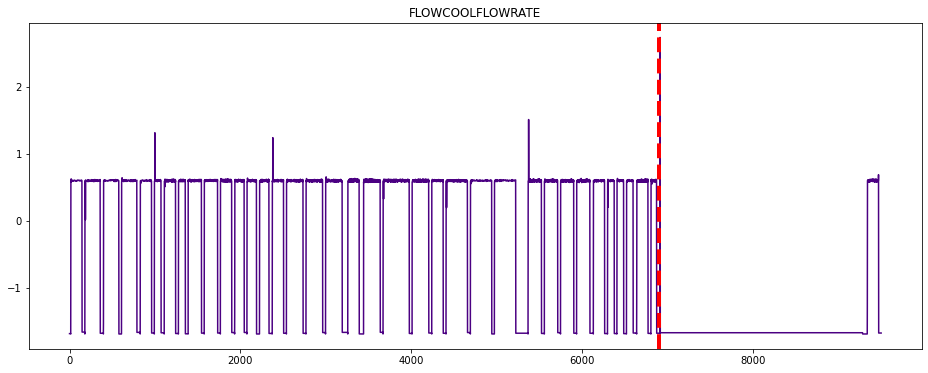

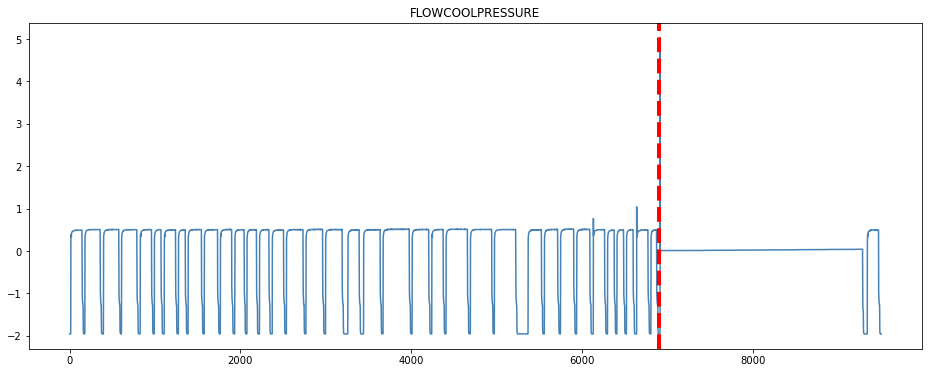

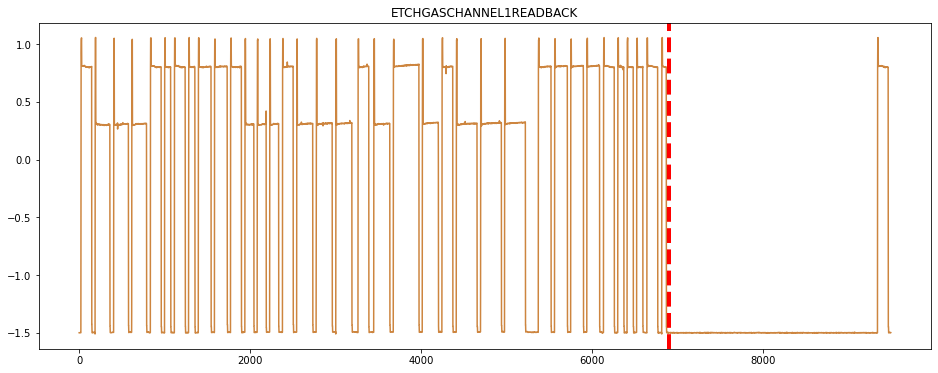

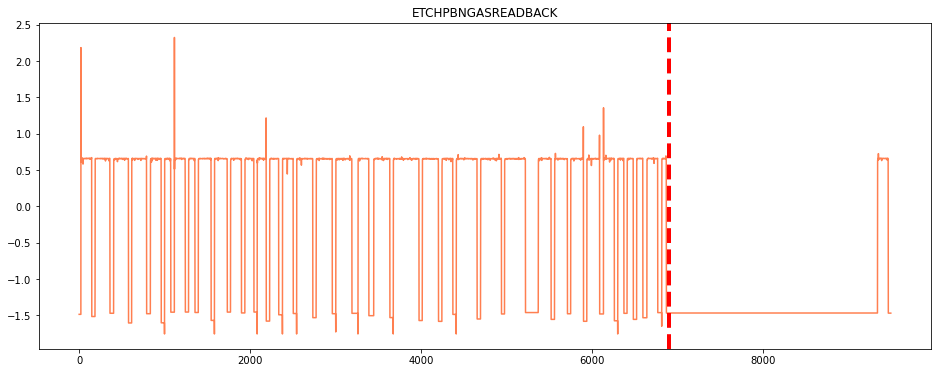

In [253]:
#FlowCool Pressure Too high

colors=['forestgreen','greenyellow','black','orange','purple','indigo','steelblue','peru','coral']
i=0
for col in features:
    fig = plt.figure(figsize=(16, 6))
    ax = fig.gca()
    feature = data[col][:9500]
    feature.plot(color= colors[i])
    i=i+1
    ax.axvline(index[0], color='red', linestyle='dashed', linewidth=4) 
    ax.set_title(col)
plt.show()

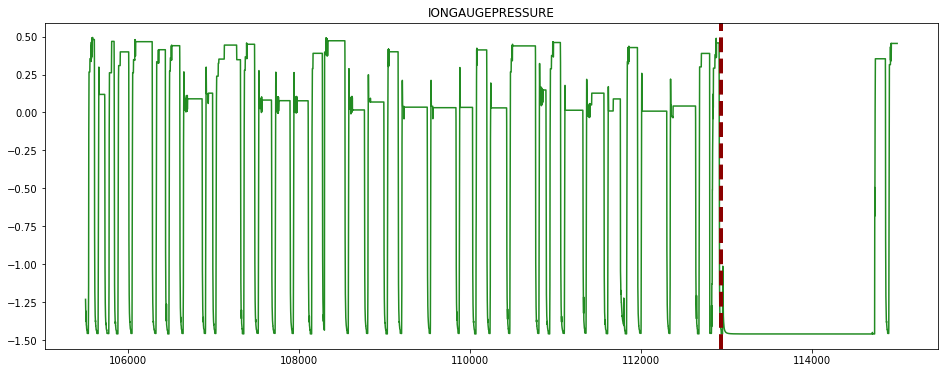

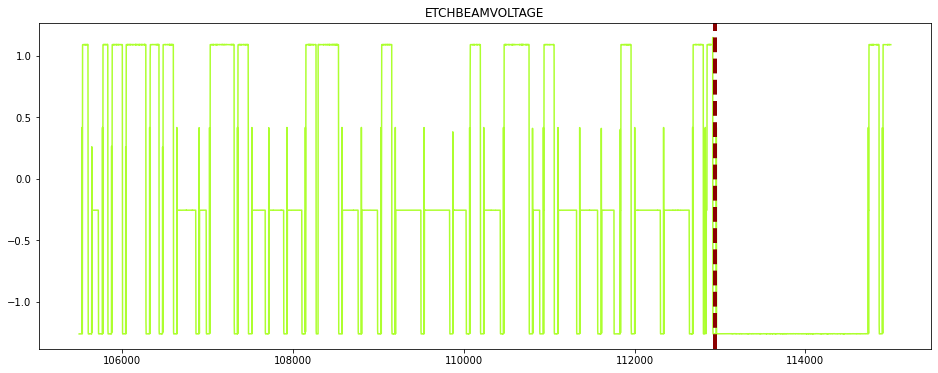

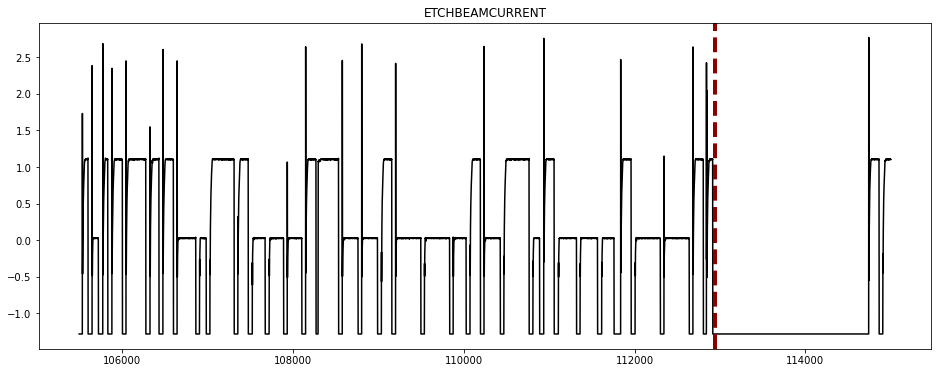

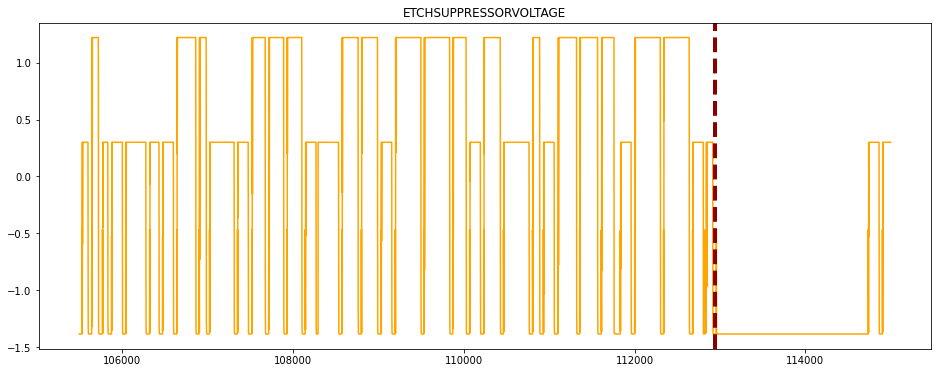

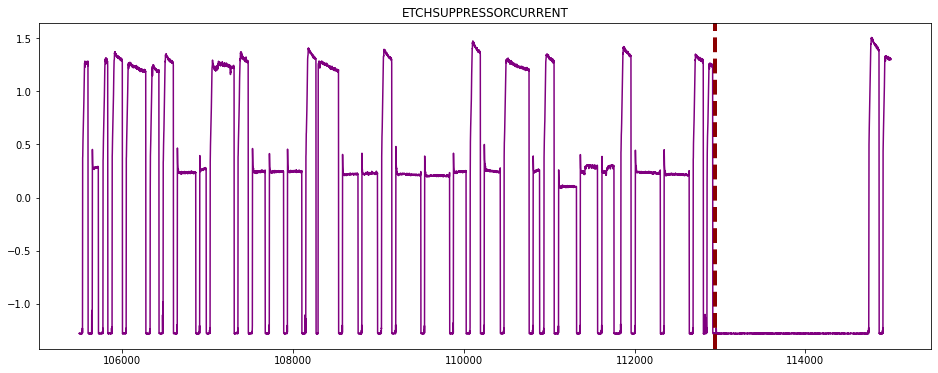

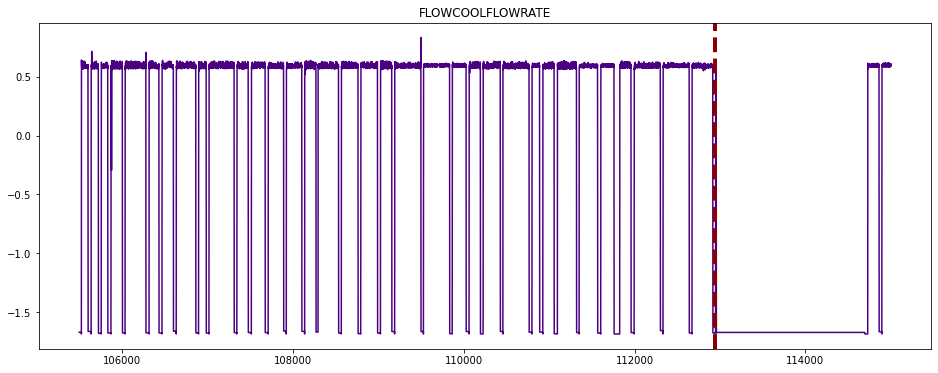

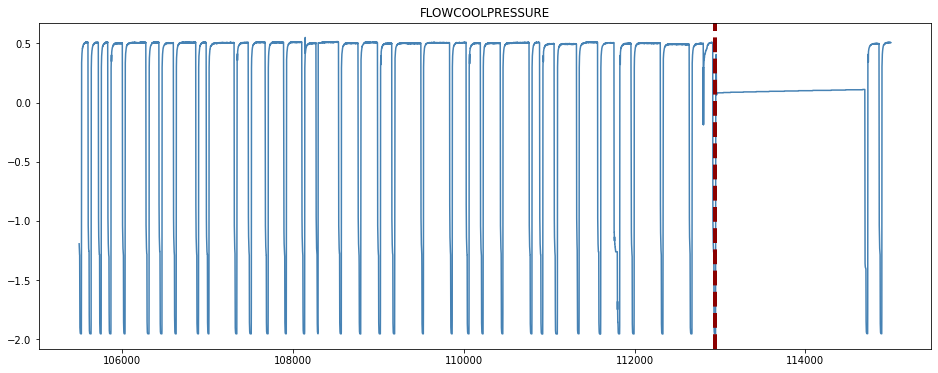

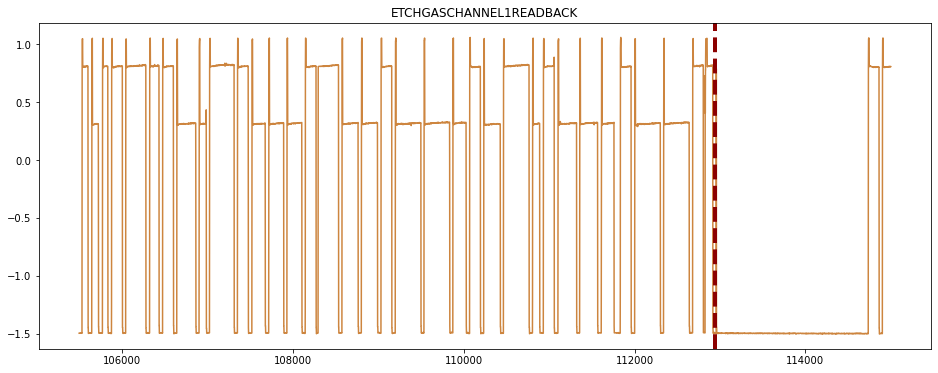

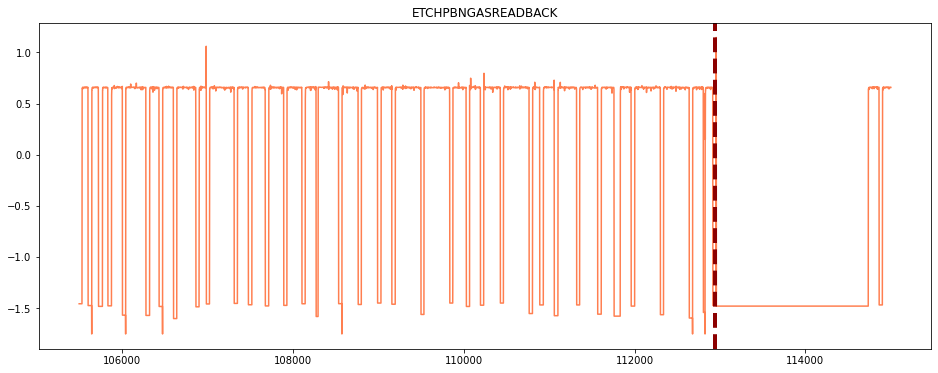

In [244]:
#Flow Cool Pressure Too low


colors=['forestgreen','greenyellow','black','orange','purple','indigo','steelblue','peru','coral']
i=0
for col in features:
    fig = plt.figure(figsize=(16, 6))
    ax = fig.gca()
    feature = data[col][105500:115000]
    feature.plot(color= colors[i])
    i=i+1
    ax.axvline(index[1], color='darkred', linestyle='dashed', linewidth=4) 
    ax.set_title(col)
plt.show()

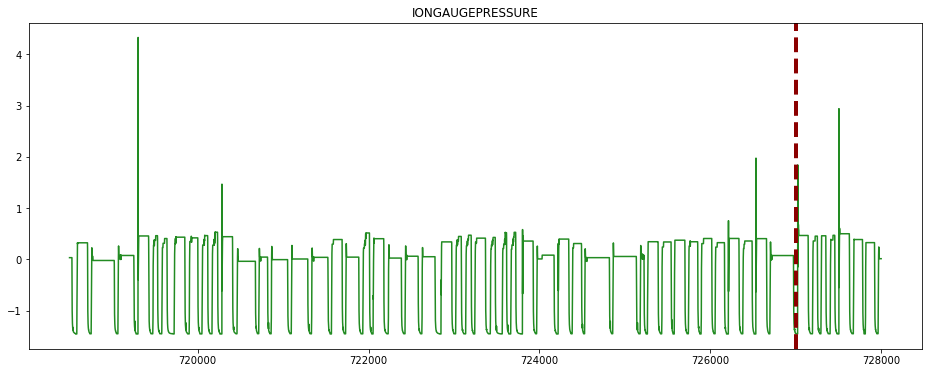

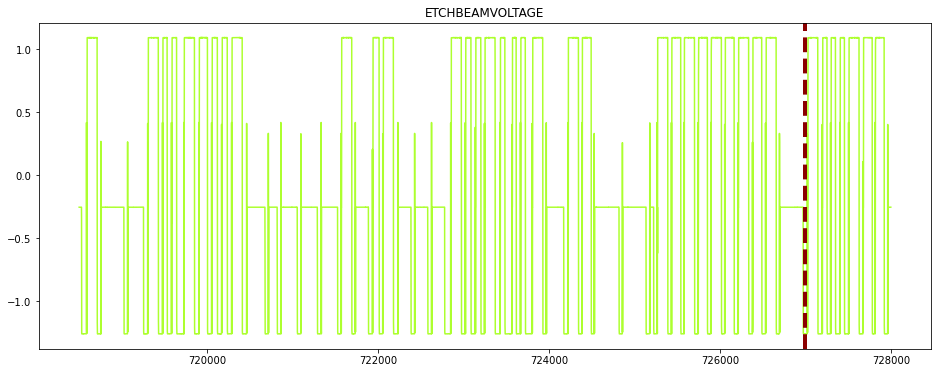

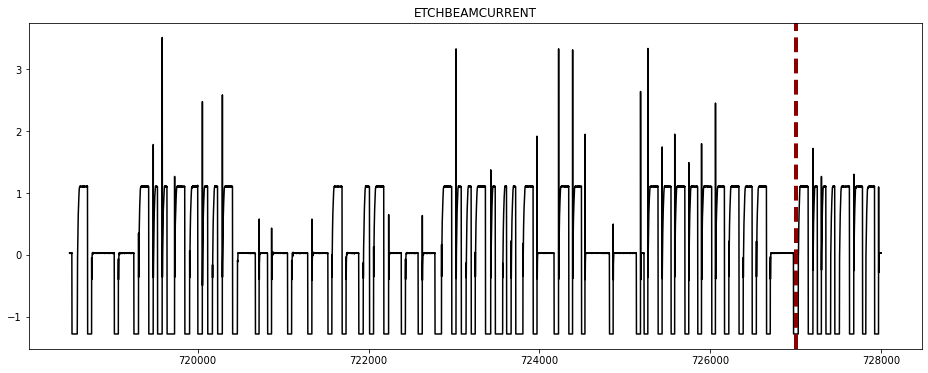

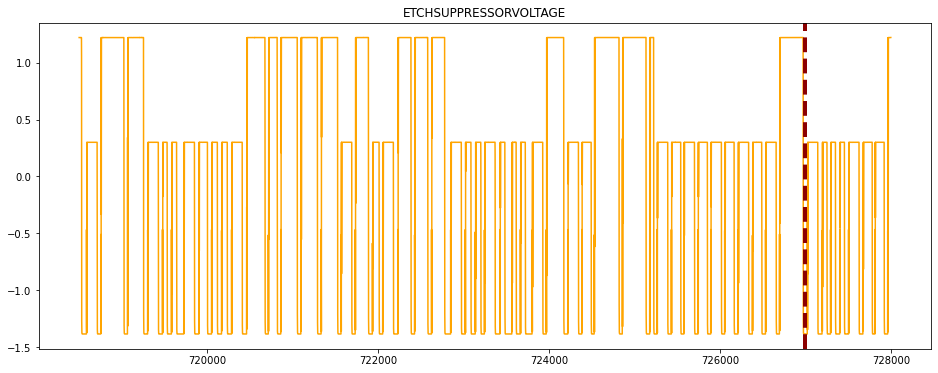

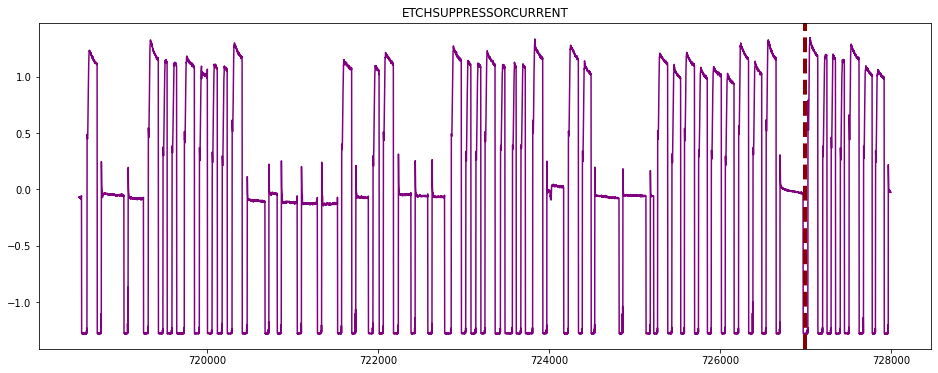

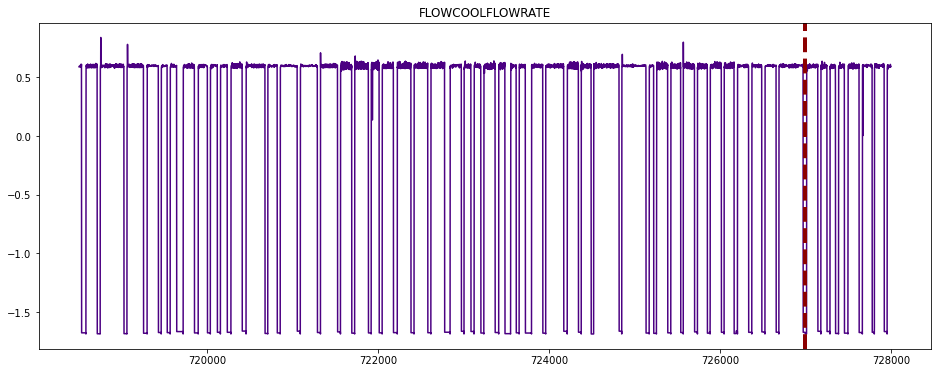

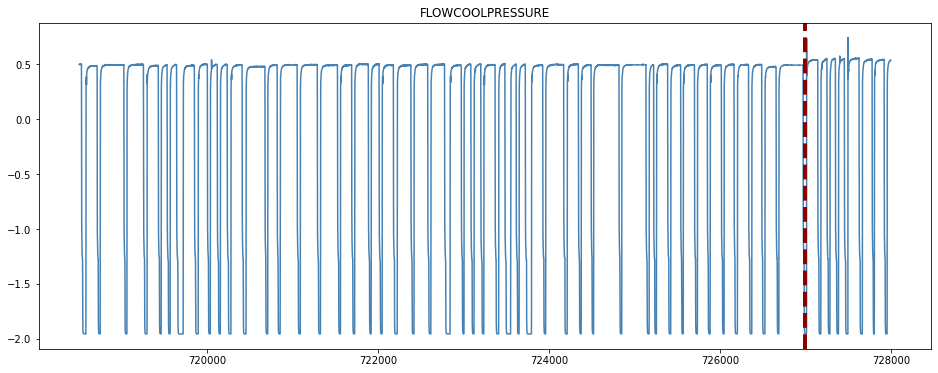

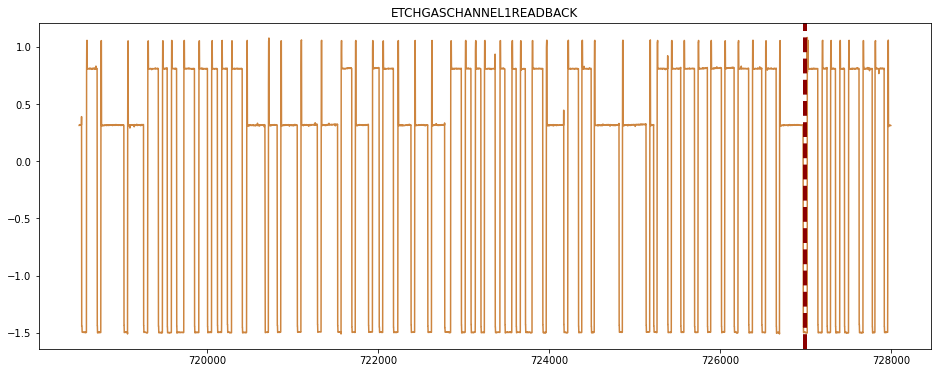

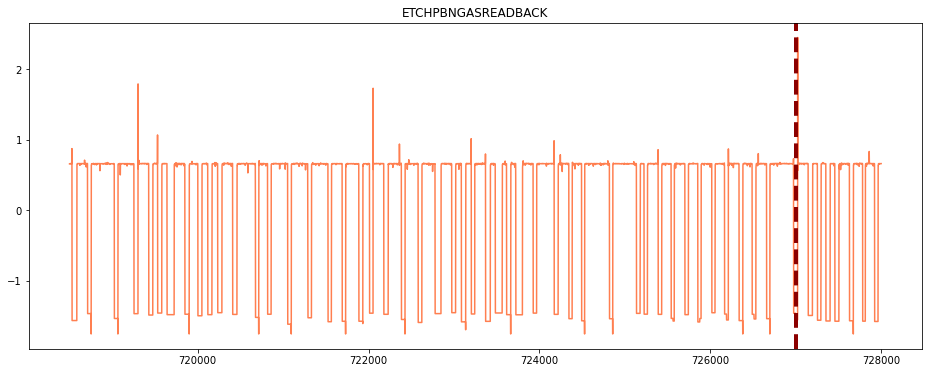

In [251]:
#Flow Cool Leak

colors=['forestgreen','greenyellow','black','orange','purple','indigo','steelblue','peru','coral']
i=0
for col in features:
    fig = plt.figure(figsize=(16, 6))
    ax = fig.gca()
    feature = data[col][718500:728000]
    feature.plot(color= colors[i])
    i=i+1
    ax.axvline(index[6], color='darkred', linestyle='dashed', linewidth=4) 
    ax.set_title(col)
plt.show()

In [250]:
728000-9500


718500

# Health Analysis:

In [2]:
#Function to find closest failures

def find_neighbours(value, df, colname):
    exactmatch = df[df[colname] == value]
    if not exactmatch.empty:
        return exactmatch.index
    else:
        upperneighbour_ind = df[df[colname] > value][colname].idxmin()
        return  upperneighbour_ind 

index=[]
for fault in faults_df.time:
    index.append(find_neighbours(fault,data,'time'))
    

In [3]:
index[4]= 599237

data['Failures']='Healthy'

data.loc[index,'Failures']='Failed'
               
import math

#function to get unhealthy
def get_unhealthy(prev_failure_point,next_failure_point,percent):
    healthy_limit= math.floor(percent*next_failure_point)
    data.loc[prev_failure_point:healthy_limit,'Failures']='UnHealthy'


In [4]:
previous=0
for i in index:
    get_unhealthy(previous,i,0.75)
    previous=i  

In [7]:
class_df = data[data['FIXTURESHUTTERPOSITION']==1]

In [8]:
class_df['Failures'].value_counts()

Healthy      778389
UnHealthy    226939
Failed            1
Name: Failures, dtype: int64

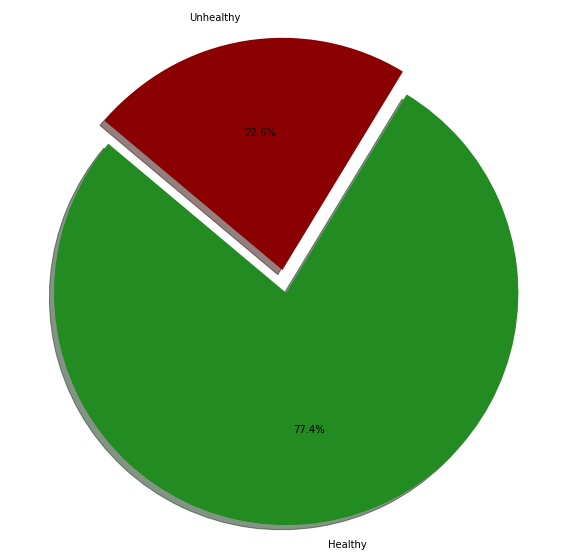

In [82]:
plt.figure(figsize=(10,10))

# Data to plot
labels= 'Healthy','Unhealthy'
sizes = class_df['Failures'].value_counts()
colors = ['forestgreen', 'darkred']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [9]:
class_df['Failures']= class_df['Failures'].map({'Healthy':1 , 'UnHealthy': 0 , 'Failed':0})

<ipython-input-9-46a391799820>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['Failures']= class_df['Failures'].map({'Healthy':1 , 'UnHealthy': 0 , 'Failed':0})


In [10]:
unhealthy_data=class_df[class_df['Failures']==0]

healthy_data=class_df[class_df['Failures']==1]

In [72]:
features=class_df[['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK']]

<AxesSubplot:>

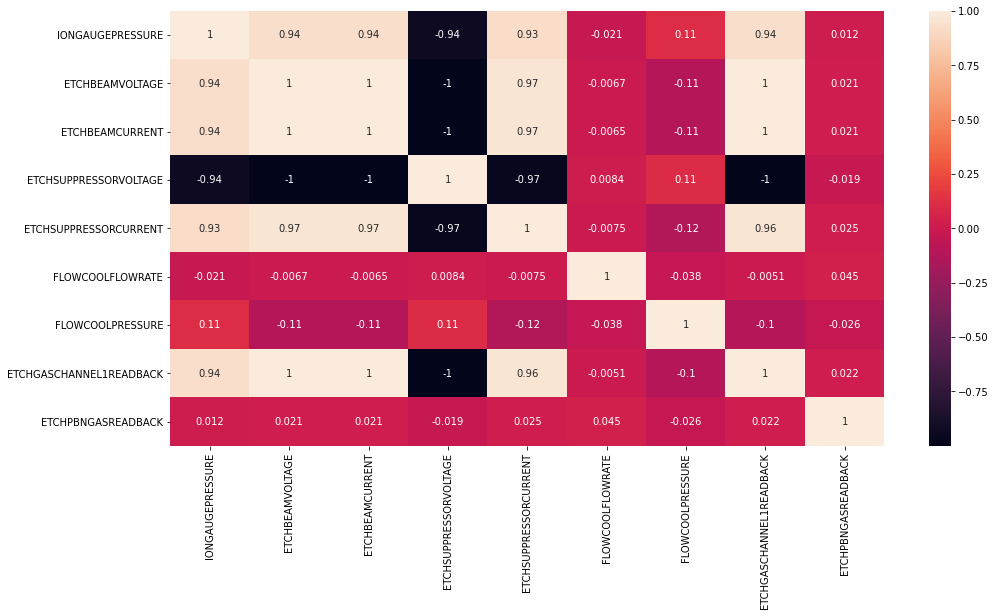

In [73]:
plt.figure(figsize=(16,8))

sns.heatmap(features.corr(),annot= True)

Text(0.5, 1.0, 'Distribution of Healthy Features')

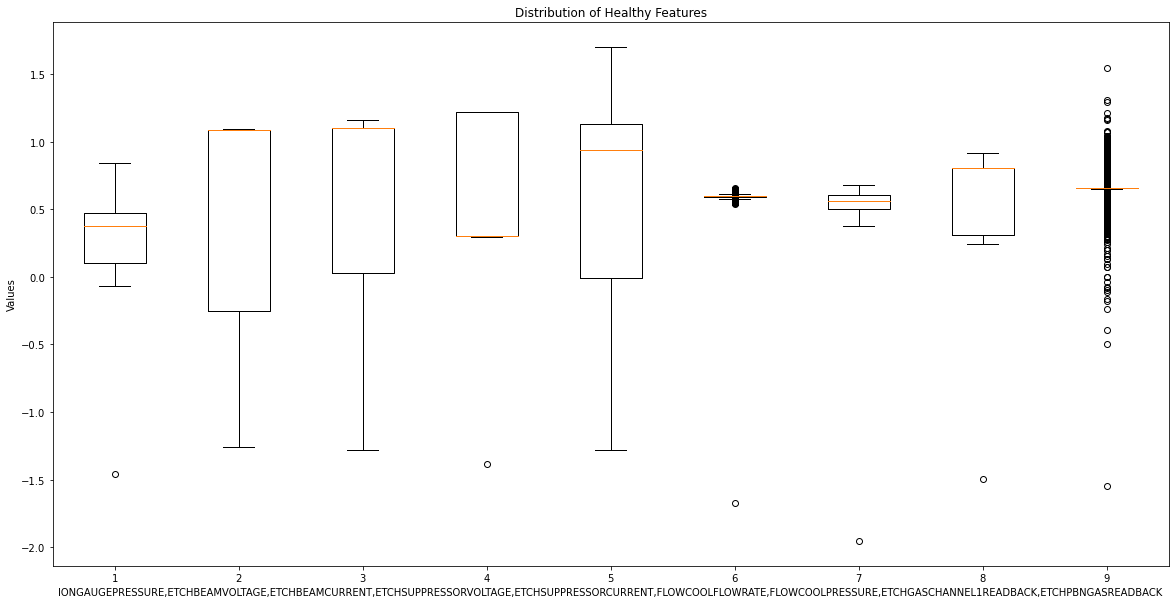

In [64]:
plt.figure(figsize=(20,10))

plt.boxplot(healthy_data[['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK']])
plt.xlabel('IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK')
plt.ylabel('Values')
plt.title('Distribution of Healthy Features')

Text(0.5, 1.0, 'Distribution of Features of Unhealthy Data')

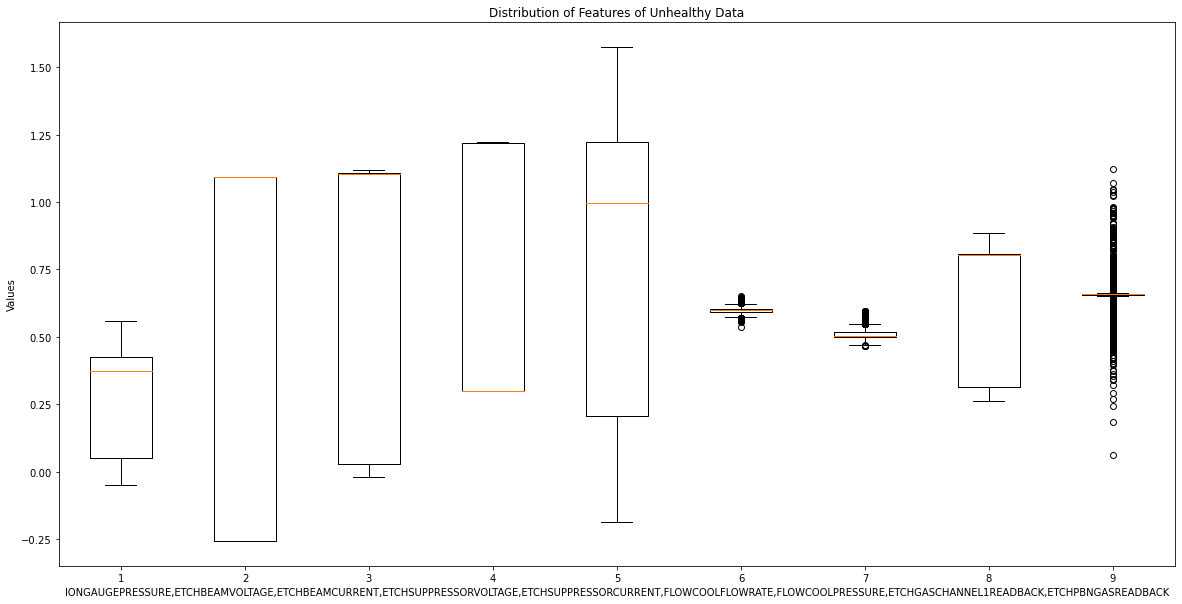

In [63]:
plt.figure(figsize=(20,10))

plt.boxplot(unhealthy_data[['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK']])
plt.xlabel('IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK')
plt.ylabel('Values')
plt.title('Distribution of Features of Unhealthy Data')

In [65]:
import statsmodels.api as sm

In [66]:
#Cross correlation
x1=sm.tsa.stattools.ccf(healthy_data['FLOWCOOLPRESSURE'][:len(unhealthy_data)], healthy_data['FLOWCOOLFLOWRATE'][:len(unhealthy_data)], adjusted=False)
x2=sm.tsa.stattools.ccf(unhealthy_data['FLOWCOOLPRESSURE'],unhealthy_data['FLOWCOOLFLOWRATE'], adjusted=False)

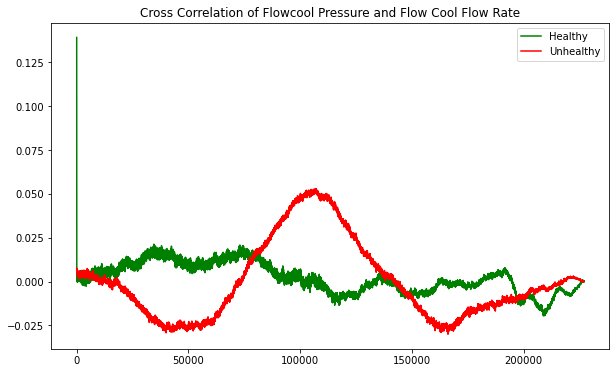

In [80]:
plt.figure(figsize=(10,6))

plt.plot(x1,color='green')
plt.title('Cross Correlation of Flowcool Pressure and Flow Cool Flow Rate')
#plt.plot(x2,color='black')
plt.plot(x2,color='red')
plt.legend(['Healthy','Unhealthy'])

In [68]:
#Cross correlation
y1=sm.tsa.stattools.ccf(healthy_data['ETCHBEAMCURRENT'][:len(unhealthy_data)], healthy_data['ETCHSUPPRESSORCURRENT'][:len(unhealthy_data)], adjusted=False)
y2=sm.tsa.stattools.ccf(unhealthy_data['ETCHBEAMCURRENT'],unhealthy_data['ETCHSUPPRESSORCURRENT'], adjusted=False)

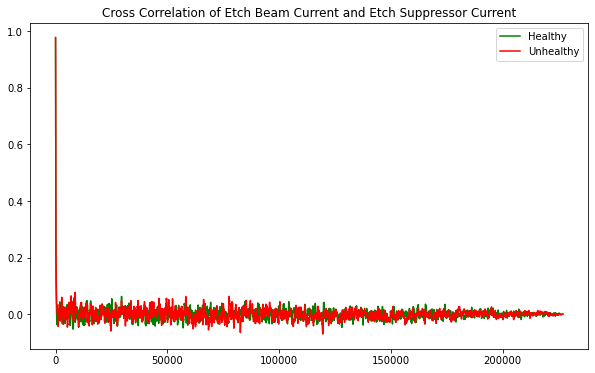

In [79]:
plt.figure(figsize=(10,6))
plt.title('Cross Correlation of Etch Beam Current and Etch Suppressor Current')
plt.plot(y1,color='green')

#plt.plot(x2,color='black')
plt.plot(y2,color='red')
plt.legend(['Healthy','Unhealthy'])

In [75]:
#Cross correlation
y1=sm.tsa.stattools.ccf(healthy_data['IONGAUGEPRESSURE'][:len(unhealthy_data)], healthy_data['ETCHBEAMVOLTAGE'][:len(unhealthy_data)], adjusted=False)
y2=sm.tsa.stattools.ccf(unhealthy_data['IONGAUGEPRESSURE'],unhealthy_data['ETCHBEAMVOLTAGE'], adjusted=False)

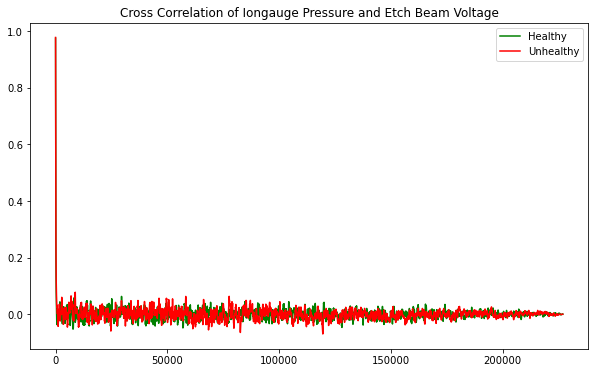

In [78]:
plt.figure(figsize=(10,6))

plt.title('Cross Correlation of Iongauge Pressure and Etch Beam Voltage')
plt.plot(y1,color='green')

#plt.plot(x2,color='black')
plt.plot(y2,color='red')
plt.legend(['Healthy','Unhealthy'])

In [267]:
def get_cross_correlation(col1,col2):
    y1=sm.tsa.stattools.ccf(healthy_data[col1][:len(unhealthy_data)], healthy_data[col2][:len(unhealthy_data)], adjusted=False)
    y2=sm.tsa.stattools.ccf(unhealthy_data[col1],unhealthy_data[col2], adjusted=False) 
    plt.figure(figsize=(10,6))

    plt.title(f'Cross Correlation of {col1} and {col2}')
    plt.plot(y1,color='green')

    #plt.plot(x2,color='black')
    plt.plot(y2,color='red')
    plt.legend(['Healthy','Unhealthy'])

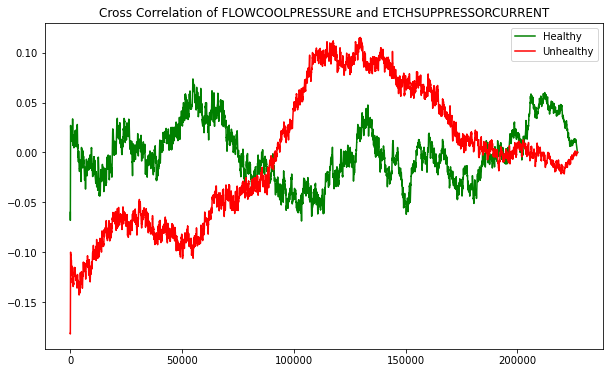

In [261]:
get_cross_correlation('FLOWCOOLPRESSURE','ETCHSUPPRESSORCURRENT')

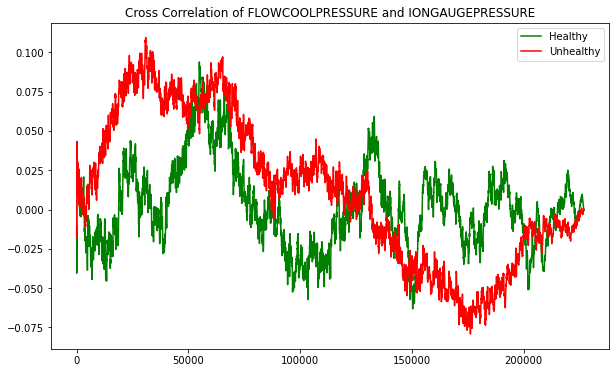

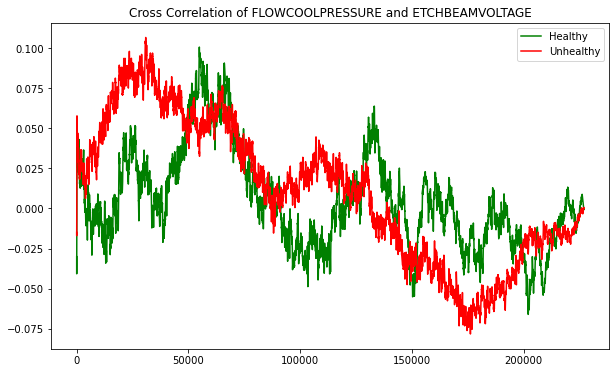

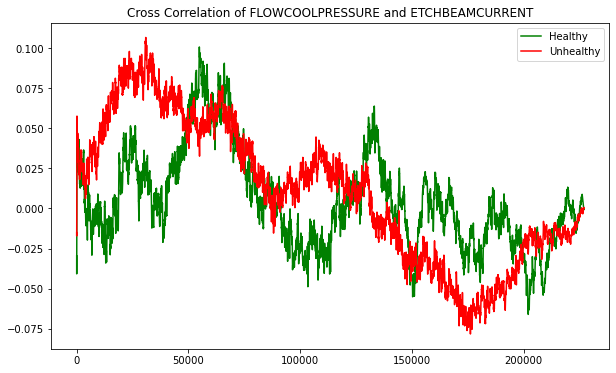

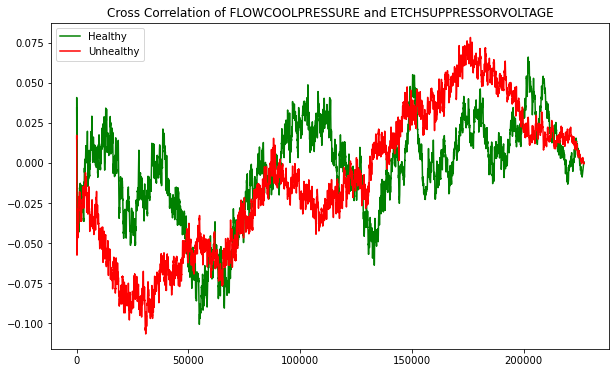

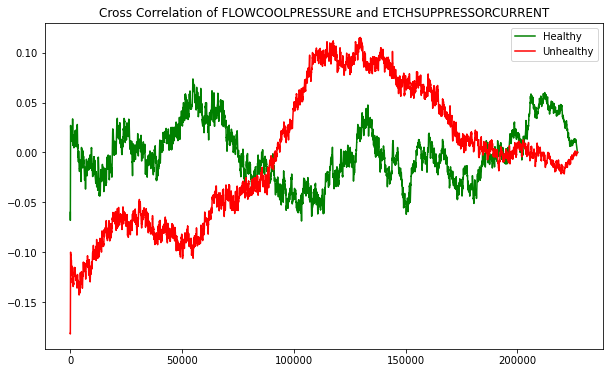

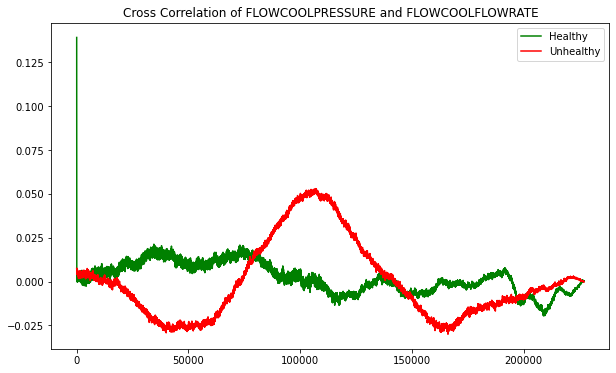

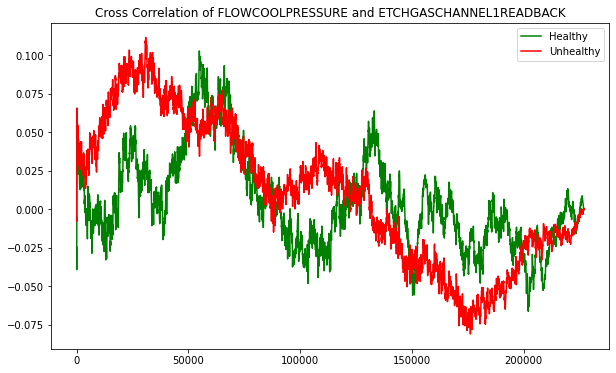

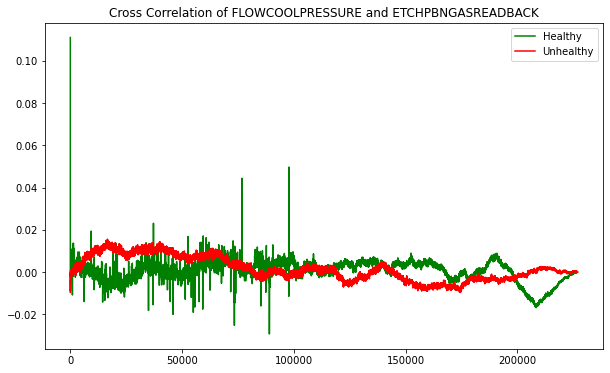

In [268]:
col1='FLOWCOOLPRESSURE'
for col2 in features:
    if col2=='FLOWCOOLPRESSURE':
        pass
    else:
        get_cross_correlation(col1,col2)
        


In [272]:
X_train=healthy_data[features]

X_train.drop(columns=['FLOWCOOLPRESSURE'],inplace=True)

y_train= healthy_data['FLOWCOOLPRESSURE']

X_test= unhealthy_data[features]

X_test.drop(columns=['FLOWCOOLPRESSURE'],inplace= True)

y_test= unhealthy_data['FLOWCOOLPRESSURE']

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [273]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [277]:
y_pred= reg.predict(X_test)

In [279]:
y_pred_train= reg.predict(X_train)

In [280]:
train_error= y_train- y_pred_train

test_error= y_test- y_pred

In [283]:
errors=pd.DataFrame({'Healthy Error': train_error,'Unhealthy Error': test_error})

Text(0.5, 1.0, 'Computing FlowCool Pressure by Regression and determining the Errors')

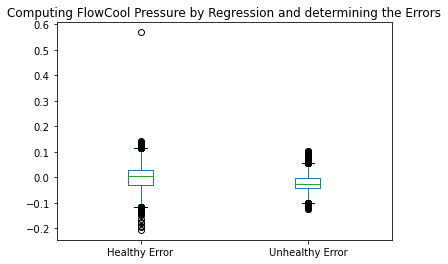

In [285]:
errors.plot(kind='box')

plt.title('Computing FlowCool Pressure by Regression and determining the Errors')

# Risk Factor Analysis:

In [93]:
unhealthy_index=class_df[class_df['Failures']==0].index

In [94]:
class_df['Unhealthy']=0


class_df.loc[unhealthy_index,'Unhealthy']=1

<ipython-input-94-29adcb1b40f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['Unhealthy']=0
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [193]:
lots_df= class_df.groupby('Lot').agg({'FLOWCOOLPRESSURE':'mean' ,'Unhealthy':'mean','IONGAUGEPRESSURE':'mean',
                                     'FLOWCOOLFLOWRATE':'mean','ETCHBEAMVOLTAGE':'mean','ETCHBEAMCURRENT':'mean',
                                     'ETCHSUPPRESSORCURRENT':'mean','ETCHGASCHANNEL1READBACK':'mean','ETCHPBNGASREADBACK':'mean'})

In [139]:
flow_cool_ratio=[]
suppressor_beam_current=[]
for lot in data.Lot.unique():
    suppressor_beam_current.append(class_df[class_df['Lot']==lot].ETCHSUPPRESSORCURRENT.median()/class_df[class_df['Lot']==lot].ETCHBEAMCURRENT.median())
    flow_cool_ratio.append(class_df[class_df['Lot']==lot].FLOWCOOLPRESSURE.min()/class_df[class_df['Lot']==lot].FLOWCOOLPRESSURE.max())
    

In [143]:
max_pressure= class_df.groupby('Lot').agg({'FLOWCOOLPRESSURE':'max'})

min_pressure= class_df.groupby('Lot').agg({'FLOWCOOLPRESSURE':'min'})

In [215]:
lots_df['Max/Min FlowCoolPressure']= max_pressure['FLOWCOOLPRESSURE']/ min_pressure['FLOWCOOLPRESSURE']

In [192]:
features.columns

Index(['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK'],
      dtype='object')

In [194]:
lots_df['Risk Factor']= 'Low'


In [111]:
lots_df['Unhealthy']

Lot
2        1.000000
3        1.000000
6        1.000000
9        1.000000
10       0.614035
           ...   
27580    0.000000
27583    0.000000
27584    0.000000
27585    0.000000
27586    0.000000
Name: Unhealthy, Length: 5679, dtype: float64

In [195]:
lots_df.loc[lots_df[lots_df['Unhealthy']>0.7].index,'Risk Factor']='High'

In [196]:
lots_df.loc[lots_df[(lots_df['Unhealthy']>0.35) & (lots_df['Unhealthy']<=0.7)].index,'Risk Factor']='Medium'

In [197]:
lots_df.loc[lots_df[lots_df['Unhealthy']<=0.35].index,'Risk Factor']='Low'

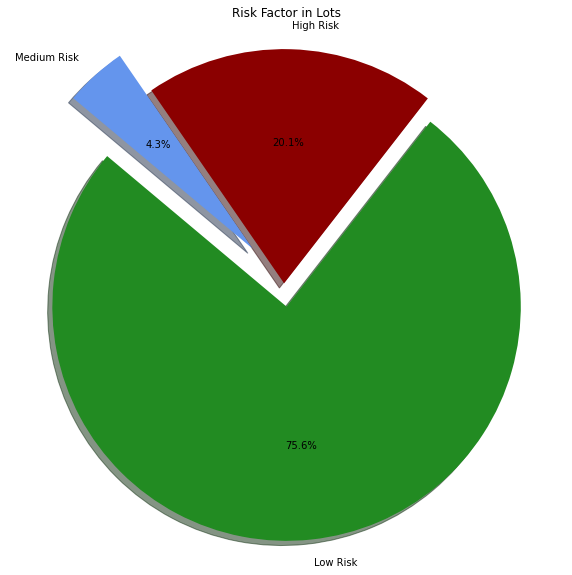

In [256]:
plt.figure(figsize=(10,10))

# Data to plot
labels= 'Low Risk','High Risk','Medium Risk'
sizes = lots_df['Risk Factor'].value_counts()
colors = ['forestgreen','darkred','cornflowerblue']
explode = (0.1, 0, 0.2)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Risk Factor in Lots')
plt.axis('equal')
plt.show()

In [155]:
low =lots_df[lots_df['Risk Factor']== 'Low']
medium =lots_df[lots_df['Risk Factor']== 'Medium']
high=lots_df[lots_df['Risk Factor']== 'High']

In [255]:
lots_df['Risk Factor'].value_counts()

Low       4293
High      1142
Medium     244
Name: Risk Factor, dtype: int64

Text(0.5, 1.0, 'Comparing Max/Min Flow Cool Pressure of Lots accroding to Low Risk Factor')

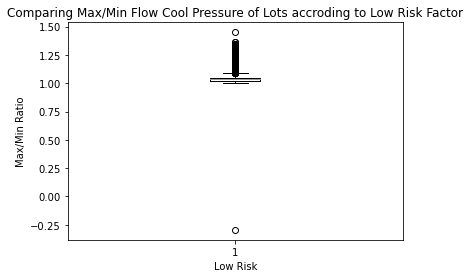

In [172]:
plt.boxplot(low['Max/Min FlowCoolPressure'])

plt.xlabel('Low Risk')

plt.ylabel('Max/Min Ratio')
plt.title('Comparing Max/Min Flow Cool Pressure of Lots accroding to Low Risk Factor')

Text(0.5, 1.0, 'Comparing Max/Min Flow Cool Pressure of Lots accroding to Medium Risk Factor')

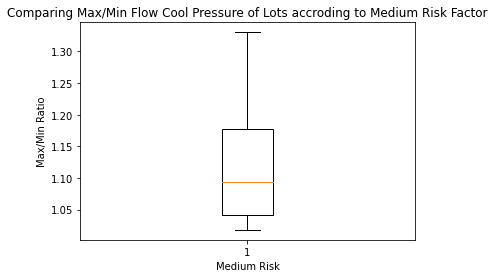

In [173]:
plt.boxplot(medium['Max/Min FlowCoolPressure'])
plt.xlabel('Medium Risk')

plt.ylabel('Max/Min Ratio')

plt.title('Comparing Max/Min Flow Cool Pressure of Lots accroding to Medium Risk Factor')

Text(0.5, 1.0, 'Comparing Max/Min Flow Cool Pressure of Lots accroding to High Risk Factor')

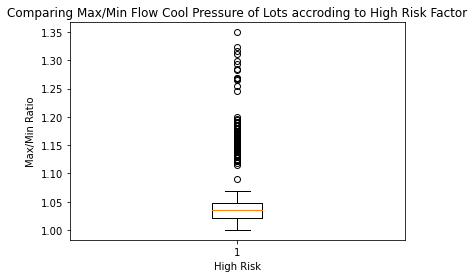

In [174]:
plt.boxplot(high['Max/Min FlowCoolPressure'])
plt.xlabel('High Risk')

plt.ylabel('Max/Min Ratio')

plt.title('Comparing Max/Min Flow Cool Pressure of Lots accroding to High Risk Factor')

Text(0, 0.5, 'Mean of Flow Cool Pressure')

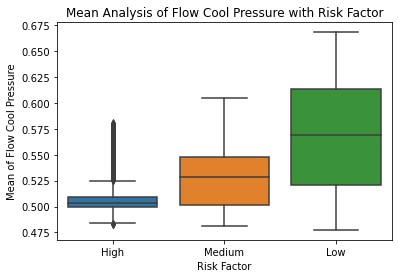

In [190]:
sns.boxplot(x='Risk Factor',y='FLOWCOOLPRESSURE',data=lots_df)

plt.title('Mean Analysis of Flow Cool Pressure with Risk Factor')

plt.ylabel('Mean of Flow Cool Pressure')

Text(0, 0.5, 'Mean of Max/Min FlowCoolPressure')

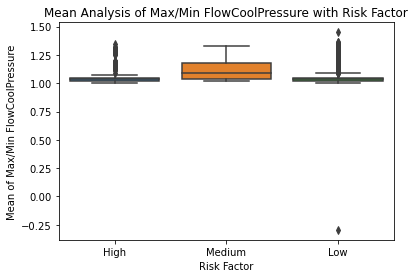

In [216]:
sns.boxplot(x='Risk Factor',y='Max/Min FlowCoolPressure',data=lots_df)

plt.title('Mean Analysis of Max/Min FlowCoolPressure with Risk Factor')

plt.ylabel('Mean of Max/Min FlowCoolPressure')

Text(0, 0.5, 'Mean of IONGAUGEPRESSURE')

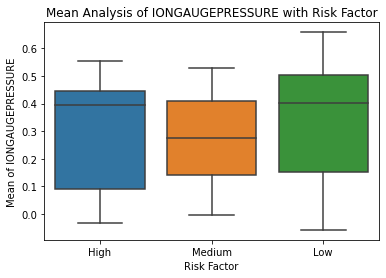

In [204]:

sns.boxplot(x='Risk Factor',y='IONGAUGEPRESSURE',data=lots_df)

plt.title(f'Mean Analysis of IONGAUGEPRESSURE with Risk Factor')

plt.ylabel(f'Mean of IONGAUGEPRESSURE')

Text(0, 0.5, 'Mean of FLOWCOOLFLOWRATE')

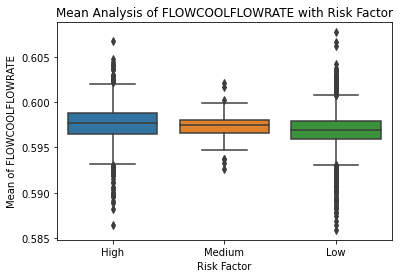

In [205]:
sns.boxplot(x='Risk Factor',y='FLOWCOOLFLOWRATE',data=lots_df)

plt.title(f'Mean Analysis of FLOWCOOLFLOWRATE with Risk Factor')

plt.ylabel(f'Mean of FLOWCOOLFLOWRATE')

Text(0, 0.5, 'Mean of ETCHBEAMVOLTAGE')

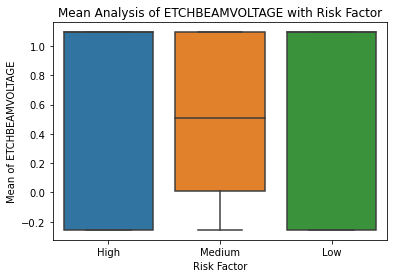

In [207]:
sns.boxplot(x='Risk Factor',y='ETCHBEAMVOLTAGE',data=lots_df)

plt.title(f'Mean Analysis of ETCHBEAMVOLTAGE with Risk Factor')

plt.ylabel(f'Mean of ETCHBEAMVOLTAGE')

Text(0, 0.5, 'Mean of ETCHBEAMCURRENT')

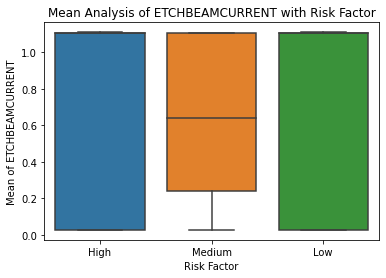

In [208]:
sns.boxplot(x='Risk Factor',y='ETCHBEAMCURRENT',data=lots_df)

plt.title(f'Mean Analysis of ETCHBEAMCURRENT with Risk Factor')

plt.ylabel(f'Mean of ETCHBEAMCURRENT')

Text(0, 0.5, 'Mean of ETCHSUPPRESSORCURRENT')

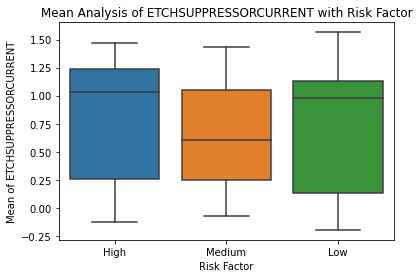

In [209]:
sns.boxplot(x='Risk Factor',y='ETCHSUPPRESSORCURRENT',data=lots_df)

plt.title(f'Mean Analysis of ETCHSUPPRESSORCURRENT with Risk Factor')

plt.ylabel(f'Mean of ETCHSUPPRESSORCURRENT')

Text(0, 0.5, 'Mean of ETCHGASCHANNEL1READBACK')

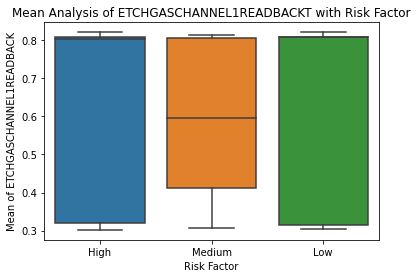

In [210]:
sns.boxplot(x='Risk Factor',y='ETCHGASCHANNEL1READBACK',data=lots_df)

plt.title(f'Mean Analysis of ETCHGASCHANNEL1READBACKT with Risk Factor')

plt.ylabel(f'Mean of ETCHGASCHANNEL1READBACK')

Text(0, 0.5, 'Mean of ETCHPBNGASREADBACK')

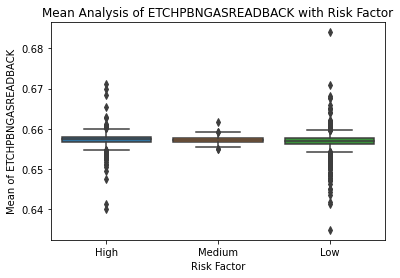

In [211]:
sns.boxplot(x='Risk Factor',y='ETCHPBNGASREADBACK',data=lots_df)

plt.title(f'Mean Analysis of ETCHPBNGASREADBACK with Risk Factor')

plt.ylabel(f'Mean of ETCHPBNGASREADBACK')

Index(['FLOWCOOLPRESSURE', 'Unhealthy', 'IONGAUGEPRESSURE', 'FLOWCOOLFLOWRATE',
       'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT', 'ETCHSUPPRESSORCURRENT',
       'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK', 'Risk Factor'],
      dtype='object')